In [10]:
#Importing libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [11]:
'''Import and Understand Each Dataset'''

'Import and Understand Each Dataset'

In [4]:
cab_df = pd.read_csv('Cab_Data.csv')
cab_df.head(3)

,Transaction ID,Date of Travel,Company,City,Profit,Price Charged,Cost of Trip,KM Travelled
0,10000011,42377,Pink Cab,ATLANTA GA,57.32,370.95,313.630,30.45
1,10000012,42375,Pink Cab,ATLANTA GA,23.666,358.52,334.854,28.62
2,10000013,42371,Pink Cab,ATLANTA GA,27.568,125.20,97.632,9.04


In [15]:
#Data Info

In [14]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  16383 non-null  int64  
 1   Date of Travel  16383 non-null  int64  
 2   Company         16383 non-null  object 
 3   City            16383 non-null  object 
 4   Profit          16383 non-null  object 
 5   Price Charged   16383 non-null  float64
 6   Cost of Trip    16383 non-null  float64
 7   KM Travelled    16383 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.0+ MB


In [16]:
#Data Type

In [7]:
cab_df.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
Profit             object
Price Charged     float64
Cost of Trip      float64
KM Travelled      float64
dtype: object

In [17]:
#we need to change the type of 'Data of Travel' Cols

In [18]:
a = cab_df['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
cab_df['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [ ]:
#Data Description

In [19]:
cab_df.describe()

,Transaction ID,Price Charged,Cost of Trip,KM Travelled
count,1.638300e+04,16383.000000,16383.000000,16383.000000
mean,1.001045e+07,465.804773,288.967313,22.657654
std,6.013370e+03,307.383069,158.977815,12.262559
min,1.000001e+07,16.380000,19.200000,1.900000
25%,1.000515e+07,220.835000,151.822000,12.000000
50%,1.001032e+07,420.350000,288.014400,22.660000
75%,1.001560e+07,643.185000,418.693000,32.960000
max,1.002084e+07,1978.790000,685.440000,48.000000


In [ ]:
#Company Col

In [9]:
cab_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [ ]:
#City Col

In [22]:
cab_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [23]:
#City DataFrame
#mport Data

In [24]:
city_df = pd.read_csv('City.csv')
city_df.head(3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


In [ ]:
#Data Info

In [25]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
#Change Datatype

In [26]:
# Attribute 'Population' should be an integer
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(float)

# Attribute 'Users' should be an integer
city_df['Users'] = [x.replace(',','') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(float)

In [27]:
# Now check the type
city_df.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [ ]:
#Data Description

In [28]:
city_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [ ]:
#Transaction ID DataFrame
#Import Data

In [29]:
transaction_id_df = pd.read_csv('Transaction_ID.csv')
transaction_id_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [30]:
#Data Info
transaction_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [31]:
#Data Description

transaction_id_df.describe(include = 'all', datetime_is_numeric=True)

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


In [ ]:
#Customer ID DataFrame
#Import Data

In [32]:
customer_id_df = pd.read_csv('Customer_ID.csv')
customer_id_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [33]:
#Data Info

customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [34]:
#Data Info

customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [35]:
#Merge and Visualize the Whole Dataset

In [36]:
#Merge the Whole Dataset

In [37]:
df= cab_df.merge(transaction_id_df, on= 'Transaction ID').merge(customer_id_df, on ='Customer ID').merge(city_df, on = 'City')
df.head(2)

,Transaction ID,Date of Travel,Company,City,Profit,Price Charged,Cost of Trip,KM Travelled,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,57.32,370.95,313.630,30.45,29290,Card,Male,28,10813,814885.0,24701.0
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,23.666,358.52,334.854,28.62,27703,Card,Male,27,9237,814885.0,24701.0


In [38]:
#Visualize the Data

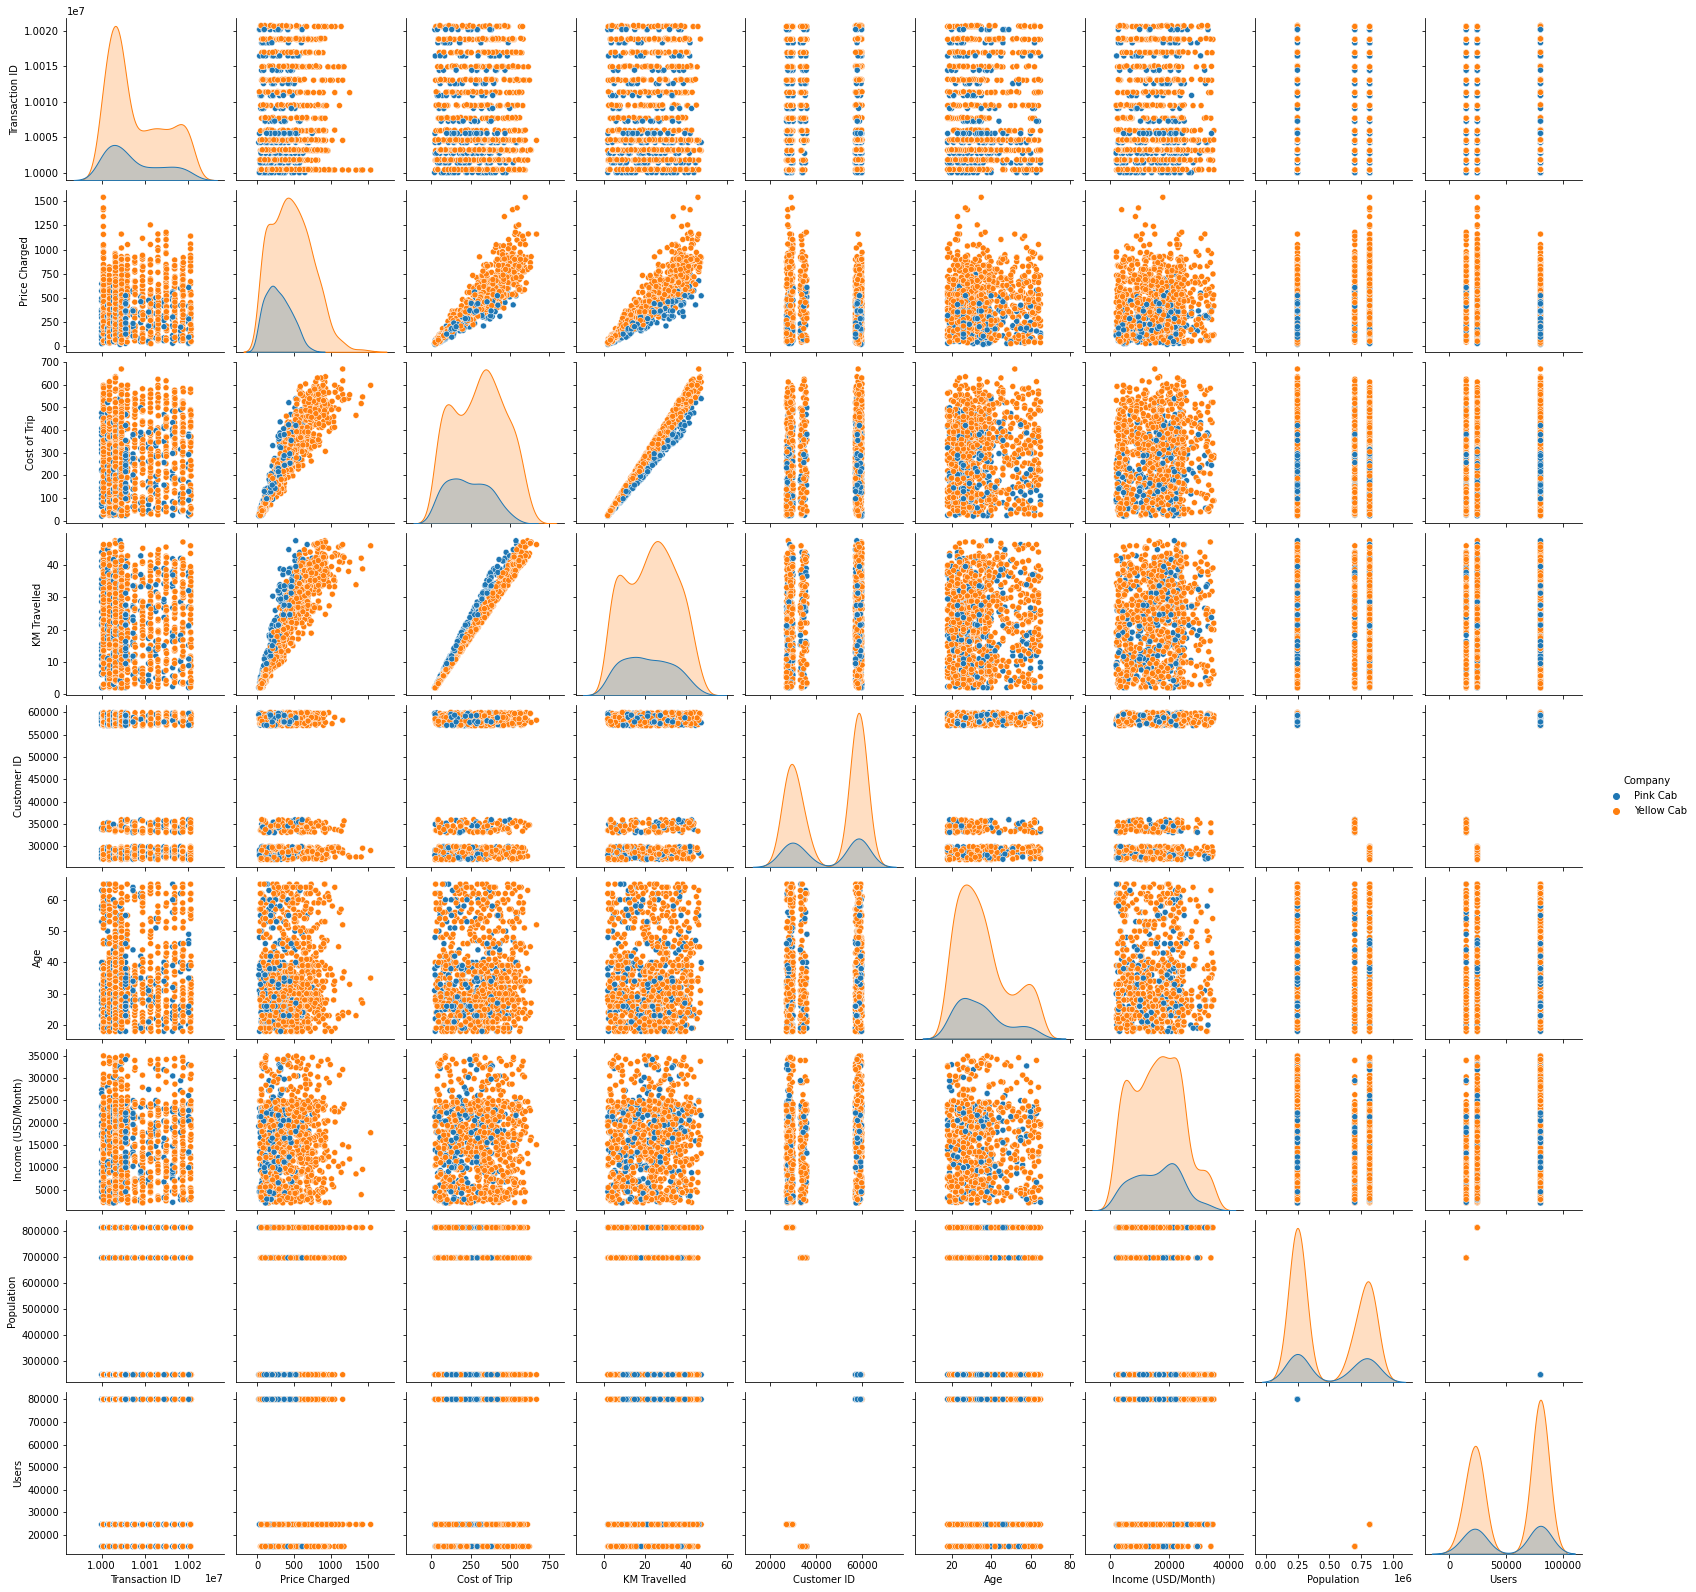

In [39]:
sns.pairplot(df.head(1000), hue = 'Company')

In [ ]:
#Check the Correlation

In [40]:
data_corr = df.corr()
data_corr

,Transaction ID,Price Charged,Cost of Trip,KM Travelled,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.055725,0.003143,0.001593,0.032195,0.011545,0.006032,0.005135,0.005873
Price Charged,-0.055725,1.000000,0.845756,0.823449,-0.201882,-0.000260,0.011806,0.362537,0.300788
Cost of Trip,0.003143,0.845756,1.000000,0.983283,-0.001401,0.003922,0.008018,0.019281,0.024419
KM Travelled,0.001593,0.823449,0.983283,1.000000,-0.003291,0.002276,0.007694,0.001220,-0.001529
Customer ID,0.032195,-0.201882,-0.001401,-0.003291,1.000000,-0.002707,-0.001333,-0.635692,-0.605790
Age,0.011545,-0.000260,0.003922,0.002276,-0.002707,1.000000,0.006721,-0.006209,-0.006032
Income (USD/Month),0.006032,0.011806,0.008018,0.007694,-0.001333,0.006721,1.000000,0.014500,0.012549
Population,0.005135,0.362537,0.019281,0.001220,-0.635692,-0.006209,0.014500,1.000000,0.908958
Users,0.005873,0.300788,0.024419,-0.001529,-0.605790,-0.006032,0.012549,0.908958,1.000000


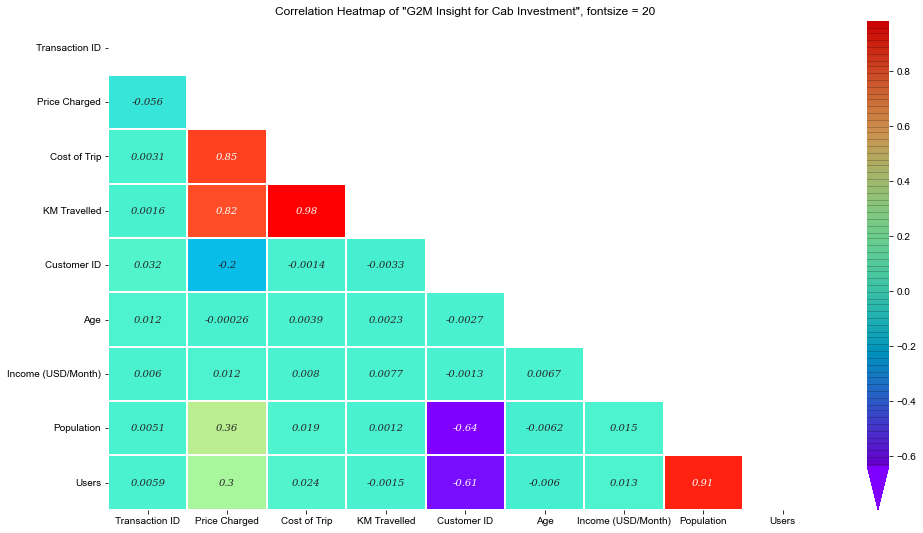

In [41]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(data_corr)

# Generate heatmap correlation
ax = sns.heatmap(data_corr, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of "G2M Insight for Cab Investment", fontsize = 20')

# Set the size of text
sns.set(font_scale = 1.2)

In [42]:
#Investigate the Data
#User Travel

In [43]:
user=df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values 

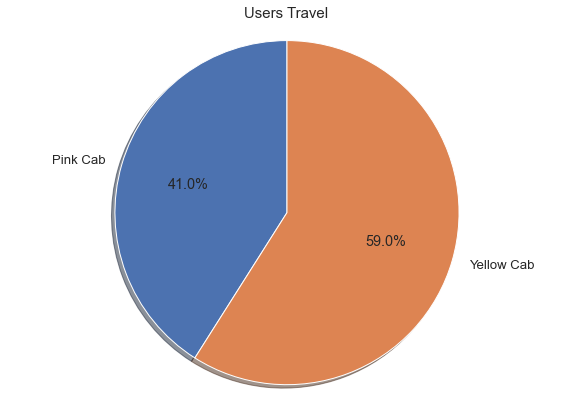

In [44]:
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 15)
plt.show()

In [45]:
"""As we can see users like to ride on `Yellow cab` more as compared to Pink Cab"""

'As we can see users like to ride on `Yellow cab` more as compared to Pink Cab'

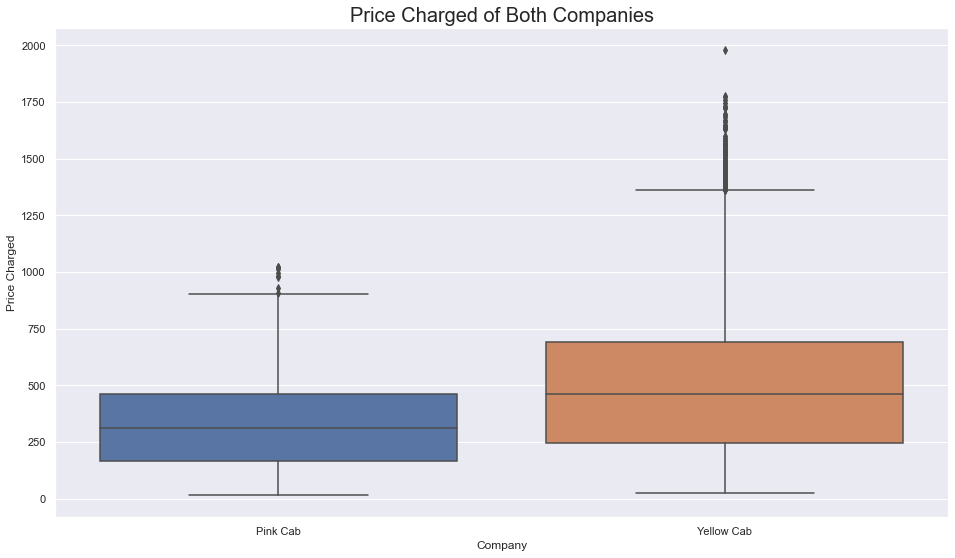

In [46]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))

sns.boxplot(df['Company'], df['Price Charged'])
plt.title('Price Charged of Both Companies', fontsize=20)
plt.show()

In [47]:
#KM Travelled Distribution

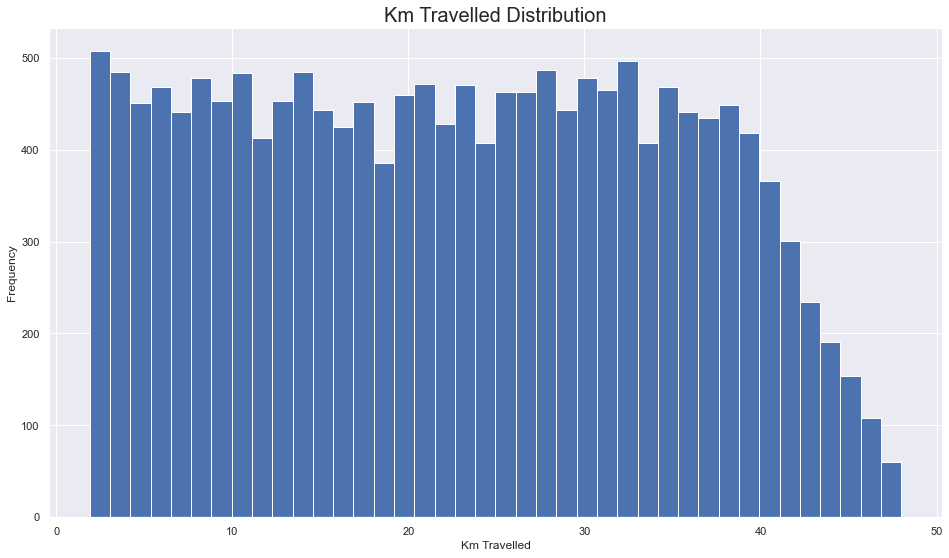

In [48]:
plt.figure(figsize = (16, 9))
plt.hist(df['KM Travelled'], bins = 40)
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()

In [49]:
"""Most of the rides varies from `2 to 48` KM."""

'Most of the rides varies from `2 to 48` KM.'

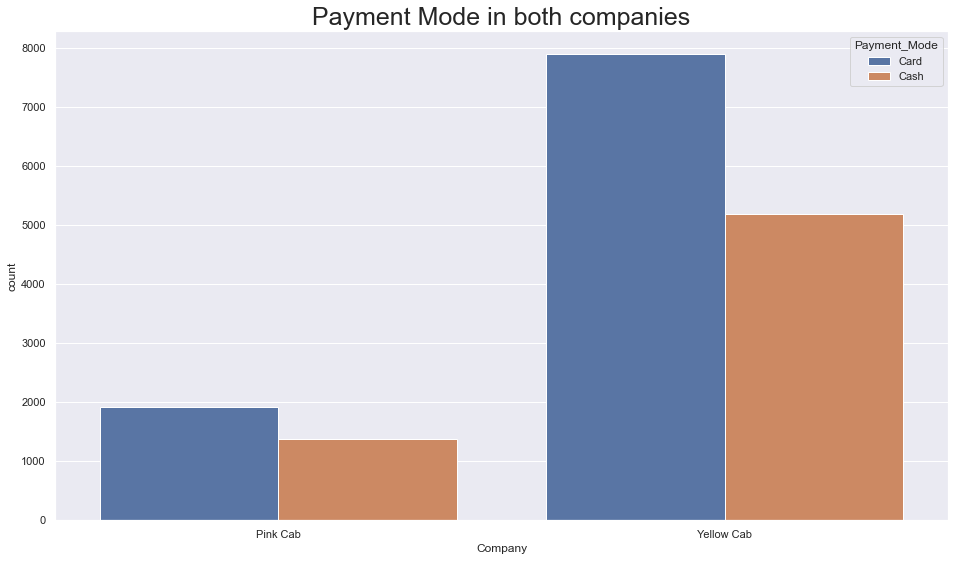

In [50]:
#Payment Mode

plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

In [51]:
"""As we can see that users prefer to pay with a card more as compared to cash"""

'As we can see that users prefer to pay with a card more as compared to cash'

In [52]:
#Gender

gender_cab=df.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()
print(gender_cab)

Company     Gender
Pink Cab    Female    1082
            Male      2029
Yellow Cab  Female    3470
            Male      6022
Name: Customer ID, dtype: int64


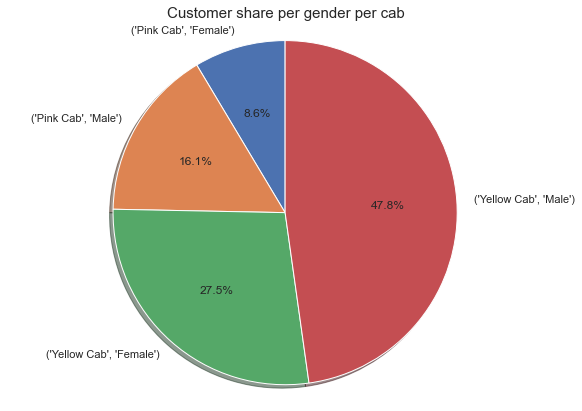

In [53]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab', fontsize = 15)
plt.show()

In [57]:
"""◉ `Male` users are prefer more to travel in Cab"""


'◉ `Male` users are prefer more to travel in Cab'

In [58]:
"""◉ Users prefer to travel in `Yellow Cab`"""

'◉ Users prefer to travel in `Yellow Cab`'

In [59]:
#Users respected Cities

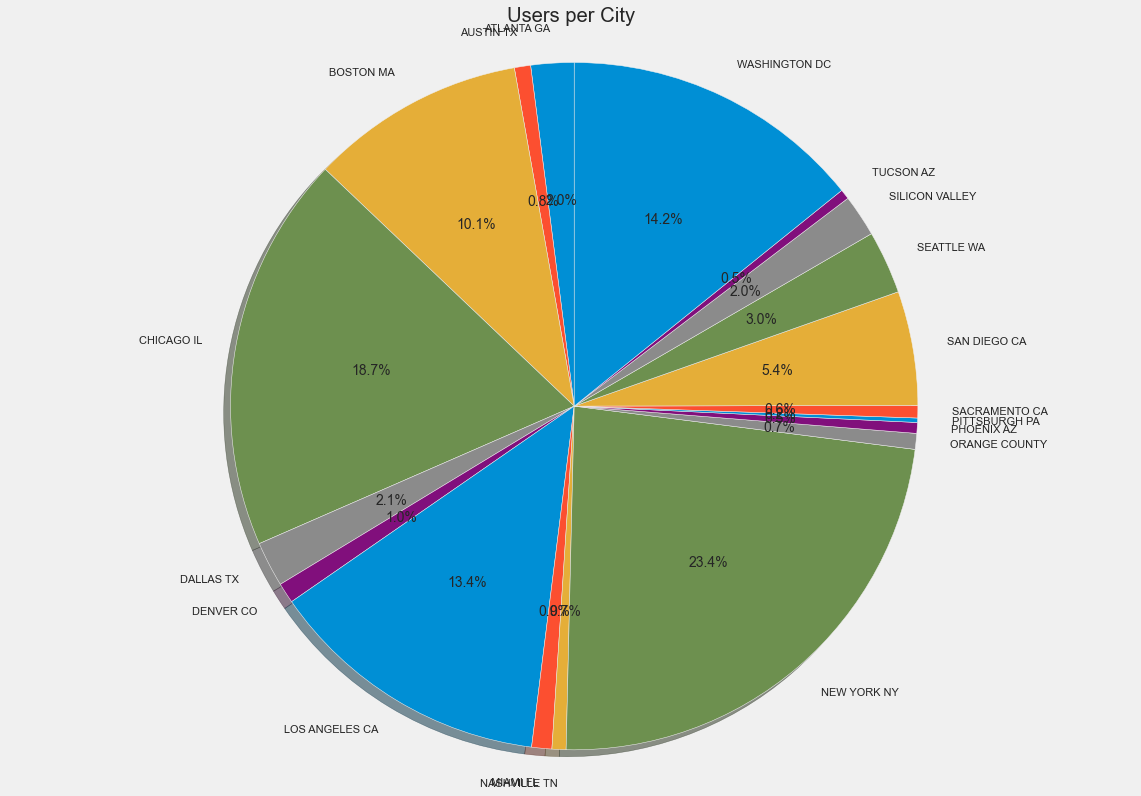

In [60]:
city_users = df.groupby('City')
city_users = city_users.Users.count()
labs = city_users.index
vals = city_users.values

plt.style.use('fivethirtyeight')
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

In [61]:
"""New York City has the highest Cab users with 28% followed by Chicago with 16% and Los Angeles with 13%"""

'New York City has the highest Cab users with 28% followed by Chicago with 16% and Los Angeles with 13%'

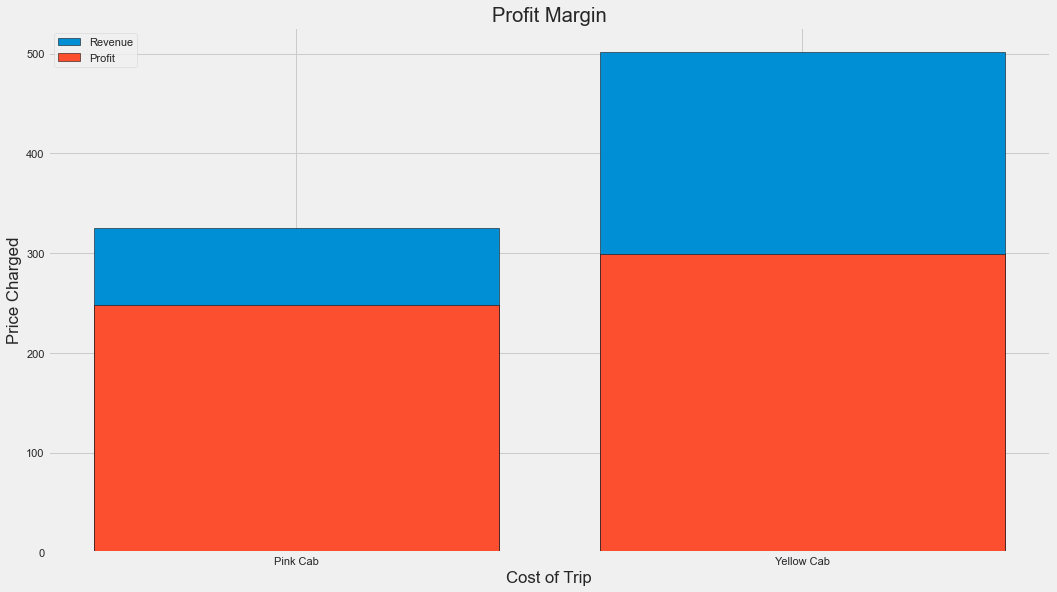

In [63]:
#Profit Margin

company = df.groupby('Company')
price_charged = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values

plt.style.use('fivethirtyeight')
plt.figure(figsize = (16, 9))
plt.bar(c, c_p, edgecolor='black', label="Revenue")
plt.bar(c, c_v, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

In [64]:
"""The Yellow cab has a higher Profit Margin (Price Charged - Cost of Trip) compared to Pink cab"""

'The Yellow cab has a higher Profit Margin (Price Charged - Cost of Trip) compared to Pink cab'

In [66]:
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day
df['Profit'] = df['Price Charged'] - df['Cost of Trip']



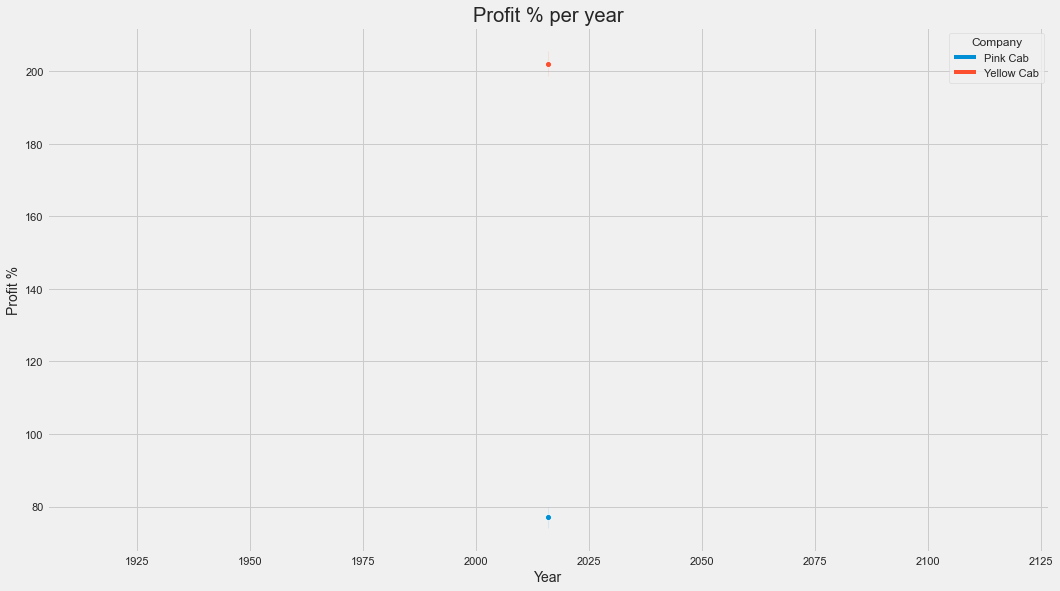

In [67]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

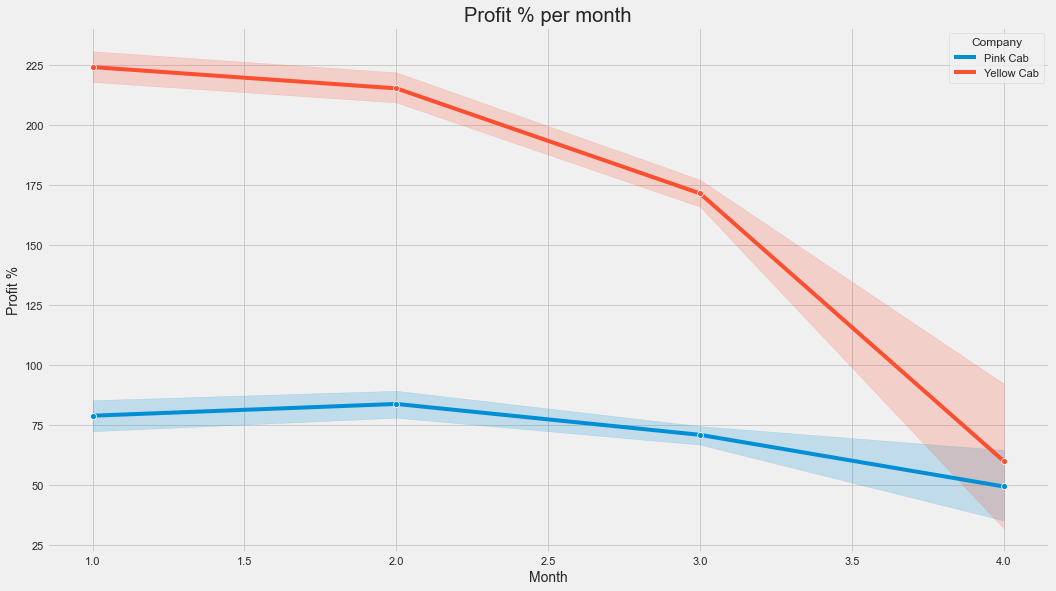

In [68]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

In [69]:
"""Profit decreases after second month"""

'Profit decreases after second month'

In [70]:
#Users Respective Population

urp = (city_df['Users'] /city_df['Population']) * 100 
city = city_df['City']

In [71]:
# Get the list of color
from random import randint

colors = []
n = 16

for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

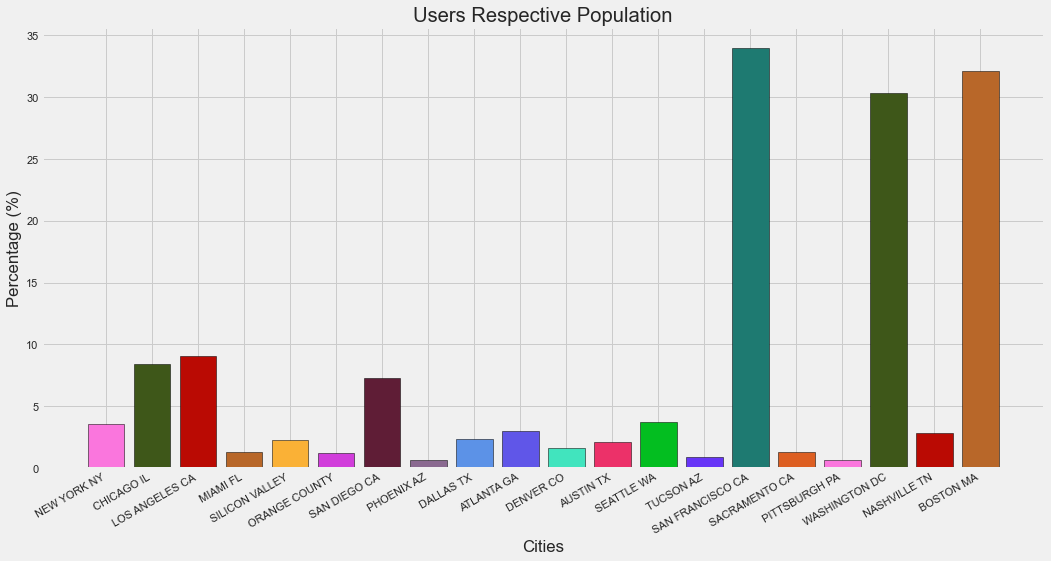

In [72]:
plt.figure(figsize = (16, 9))
plt.bar(city, urp, edgecolor='black', color = colors)
plt.gcf().autofmt_xdate()
plt.title('Users Respective Population')
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.show()

In [73]:
"""As we can see in cities `San Francisco`, `Washington` and `Boston` more than 30% of population use cab service"""

'As we can see in cities `San Francisco`, `Washington` and `Boston` more than 30% of population use cab service'

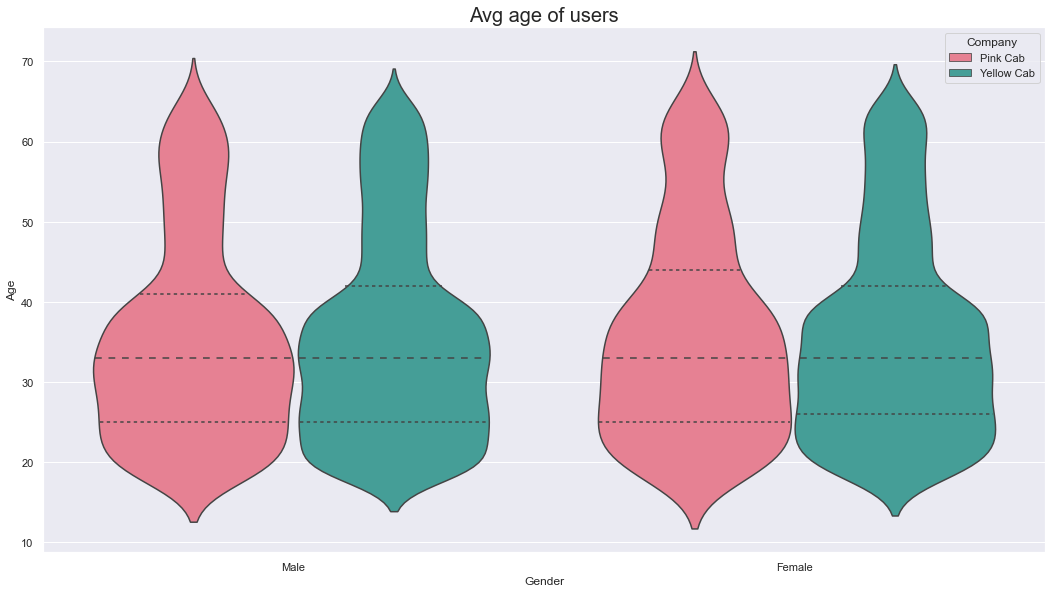

In [74]:
#Average Age of Users

sns.set(style = 'darkgrid') 

plt.figure(figsize = (16, 9))

sns.violinplot(df['Gender'], df['Age'], hue = df['Company'], palette = 'husl', inner = 'quartiles')
plt.title('Avg age of users', fontsize=20)
plt.show()

In [75]:
"""As we can see `35 Avg age` of Female and Male who use Cab service"""

'As we can see `35 Avg age` of Female and Male who use Cab service'

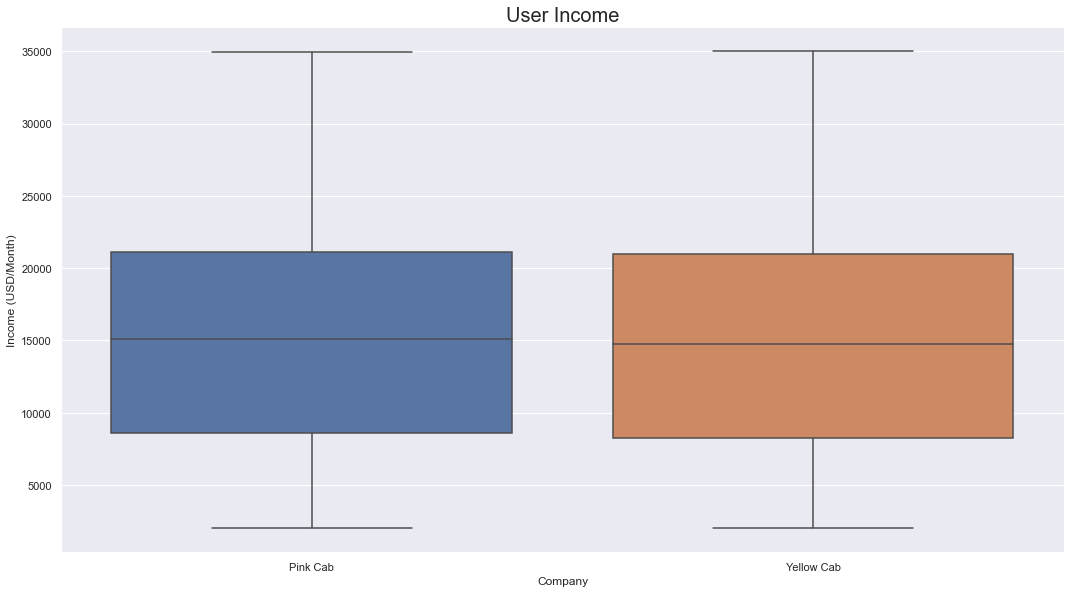

In [76]:
#Average Income

sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))

sns.boxplot(df['Company'], df['Income (USD/Month)'])
plt.title('User Income', fontsize=20)
plt.show()

In [77]:
"""As we can see Avg income is around 15k$ who use cab sevice"""

'As we can see Avg income is around 15k$ who use cab sevice'

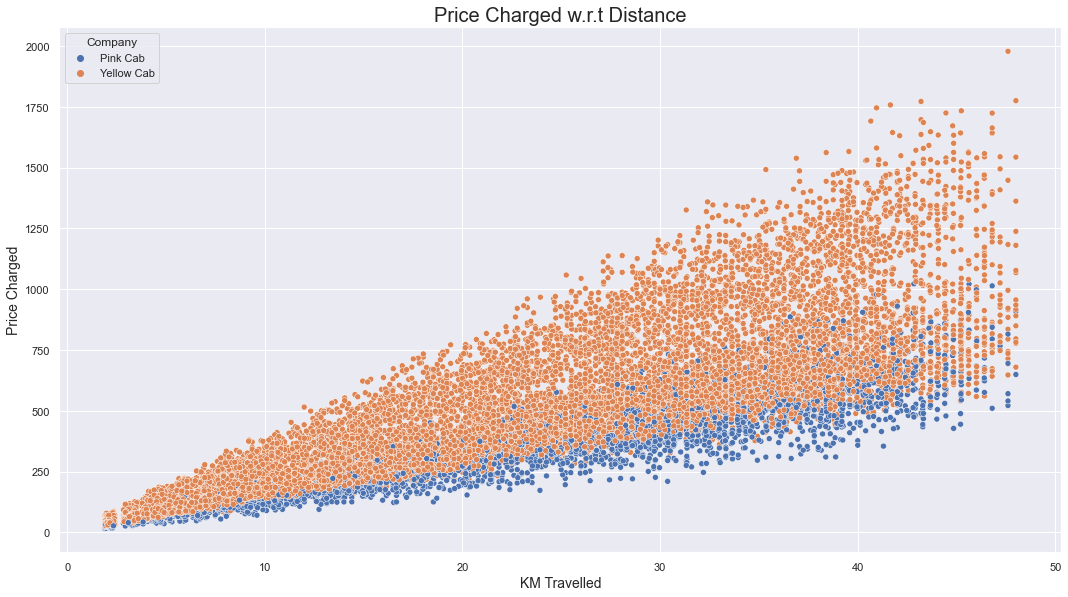

In [78]:
#Price Charged w.r.t Distance

plt.figure(figsize = (16, 9))

sns.scatterplot(data=df, x="KM Travelled", y='Price Charged', hue='Company')
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

In [79]:
"""As we can see there is a linear relationship between KM traveled and Price Charged as we expected. However, Yellow Cab has high charges compared to Pink."""

'As we can see there is a linear relationship between KM traveled and Price Charged as we expected. However, Yellow Cab has high charges compared to Pink.'

In [80]:
#Create Multiple Hypothesis and Investigate
#Hypothesis 1: Is there any difference in profit regarding Gender

#H0 : There is no difference regarding Gender in both cab companies. 
#H1 : There is difference regarding Gender in both cab companies.

In [81]:
#Pink Cab

In [82]:
a = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab')

2158 1139
P value is  0.5068839696067025
We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab


In [83]:
#Yellow Cab

In [84]:
a = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab')

8619 4467
P value is  2.6992767108857327e-05
We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab


In [86]:
#Hypothesis 2: Is there any difference in Profit regarding Age

#H0 : There is no difference regarding Age in both cab companies. 
#H1 : There is difference regarding Age in both cab companies.

In [87]:
#Pink Cab

In [88]:
a = df[(df.Age <= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

3113 217
P value is  0.3852405778894147
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


In [90]:
a = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab')

8619 4467
P value is  2.6992767108857327e-05
We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab


In [92]:
#Create Multiple Hypothesis and Investigate
#Hypothesis 1: Is there any difference in profit regarding Gender

#H0 : There is no difference regarding Gender in both cab companies. 
#H1 : There is difference regarding Gender in both cab companies.

In [94]:
#Pink Cab

a = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab')

2158 1139
P value is  0.5068839696067025
We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab


In [95]:
#Yellow Cab

a = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab')

8619 4467
P value is  2.6992767108857327e-05
We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab


In [97]:
#Hypothesis 2: Is there any difference in Profit regarding Age

#H0 : There is no difference regarding Age in both cab companies. 
#H1 : There is difference regarding Age in both cab companies.

In [98]:
#Pink Cab

a = df[(df.Age <= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

3113 217
P value is  0.3852405778894147
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


In [99]:
#Yellow Cab

a = df[(df.Age <= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab')

12389 818
P value is  0.06647517326440426
We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab


In [100]:
#Hypothesis 3: Is there any difference in Profit regarding Payment mode

#H0 : There is no difference regarding Payment_Mode in both cab companies. 
#H1 : There is difference regarding Payment_Mode in both cab companies.

In [101]:
#Pink Cab

a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.94245720326531
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


In [102]:
#yellow Cab

a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab')

P value is  0.36932328730642683
We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab


In [ ]:
#There is no difference in payment mode for both cab companies.